# Asssignment:

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

Dataset: https://www.kaggle.com/miroslavsabo/young-people-survey

Description: Database of survey answers

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

### The variables can be split into the following groups:

- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

# Goal: Pick a spending habits variable as an outcome variable

### SPENDING HABITS
- Finances
    - I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer) 
- Shopping centres
    - I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Branded clothing
    - I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Entertainment spending
    - I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Spending on looks
    - I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Spending on gadgets
    - I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Spending on healthy eating
    - I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
responses = pd.read_csv('young-people-survey/responses.csv')
responses.dtypes

Music                         float64
Slow songs or fast songs      float64
Dance                         float64
Folk                          float64
Country                       float64
Classical music               float64
Musical                       float64
Pop                           float64
Rock                          float64
Metal or Hardrock             float64
Punk                          float64
Hiphop, Rap                   float64
Reggae, Ska                   float64
Swing, Jazz                   float64
Rock n roll                   float64
Alternative                   float64
Latino                        float64
Techno, Trance                float64
Opera                         float64
Movies                        float64
Horror                        float64
Thriller                      float64
Comedy                        float64
Romantic                      float64
Sci-fi                        float64
War                           float64
Fantasy/Fair

In [45]:
.25**2

0.0625

In [49]:
spending_corr.loc['Fun with friends']

Finances                     -0.113075
Shopping centres              0.101143
Branded clothing              0.099241
Entertainment spending        0.267525
Spending on looks             0.173590
Spending on gadgets           0.109006
Spending on healthy eating    0.107826
Name: Fun with friends, dtype: float64

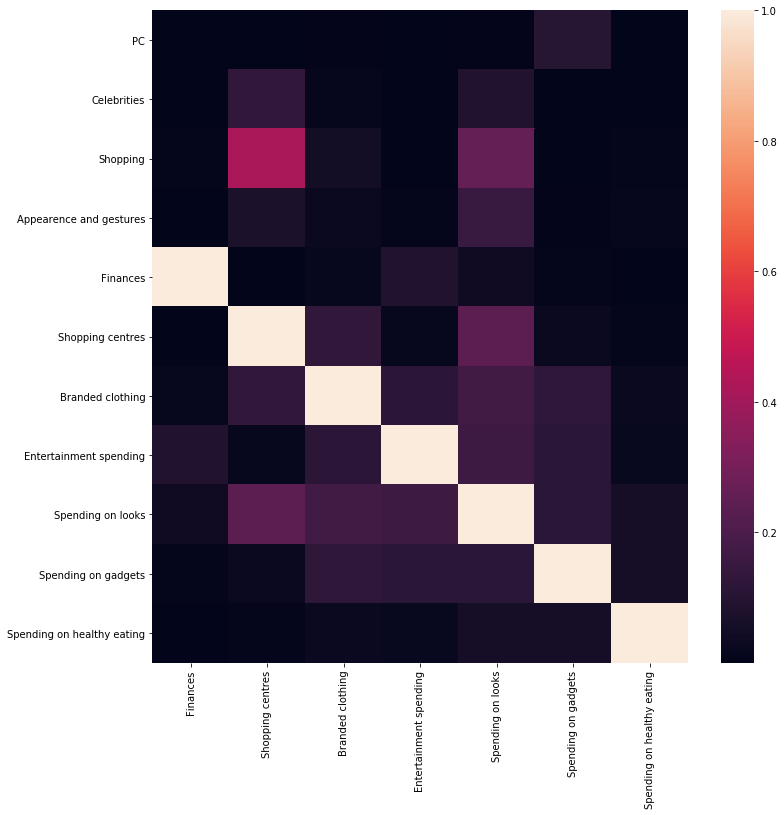

In [50]:
# explore correlations of spending habits variables
resp_corr = responses.corr()
spending_corr = resp_corr[['Finances','Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']]

# get r2 values instead of r values
spending_corr = spending_corr.apply(lambda r: r**2)

# make heatmap with only rows that have at least one minimum correlation with spending habits variables
# put another way: get rid of rows without at least one correlation greater than the min corr
min_corr = .1
sc = spending_corr[(spending_corr['Finances'] > min_corr)|
                   (spending_corr['Shopping centres'] > min_corr)|
                   (spending_corr['Branded clothing'] > min_corr)|
                   (spending_corr['Entertainment spending'] > min_corr)|
                   (spending_corr['Spending on looks'] > min_corr)  | 
                   (spending_corr['Spending on gadgets'] > min_corr)| 
                   (spending_corr['Spending on healthy eating'] > min_corr)
                  ]

plt.figure(figsize=(12, 12))
sns.heatmap(sc)

No correlations are all that strong but Spending on looks seems to have the most correlations (with r2 > .10). We will pick spedning on looks as our outcome variable

In [54]:
sc['Spending on looks'].sort_values()

PC                            0.004748
Finances                      0.042646
Spending on healthy eating    0.055512
Celebrities                   0.086756
Spending on gadgets           0.111842
Appearence and gestures       0.150536
Entertainment spending        0.162938
Branded clothing              0.173787
Shopping centres              0.238582
Shopping                      0.261108
Spending on looks             1.000000
Name: Spending on looks, dtype: float64

### Continuous variables of interest (highest r2 values)
- Spending on gadgets
    - r2: 0.111842
- Appearence and gestures 
    - r2: 0.150536
- Entertainment spending        
    - r2: 0.162938
- Branded clothing              
    - r2: 0.173787
- Shopping centres              
    - r2: 0.238582
- Shopping                      
    - r2: 0.261108

In [64]:
def anova_matrix(df):
    '''computes pairwise one way f test p_values of columns (categorical + continuous pairs)'''
    art = []
#     cols = []
    for col1 in df.columns:
        if df[col1].dtype == 'object':
            art.append([])
            for col2 in df.columns:
                if df[col2].dtype != 'object':
                    observed = []
                    for cat in df[col1].dropna().unique():
                        sample = df[df[col1]==cat][col2].dropna()
                        observed.append(sample)
                    p_val = stats.f_oneway(*observed)[1]
                    art[-1].append(p_val)
    return pd.DataFrame(art, index=[col for col in df.columns if df[col].dtype == 'object'], columns=[col for col in df.columns if df[col].dtype != 'object'])
        

In [67]:
anova = anova_matrix(responses)
anova['Spending on looks']

Smoking                   0.000001
Alcohol                   0.010239
Punctuality               0.138777
Lying                     0.557639
Internet usage            0.277703
Gender                    0.000092
Left - right handed       0.277470
Education                 0.431796
Only child                0.002460
Village - town            0.004468
House - block of flats    0.514533
Name: Spending on looks, dtype: float64

### Categorical variables of interest (lowest p values):
- Smoking
- Gender
- Only Child

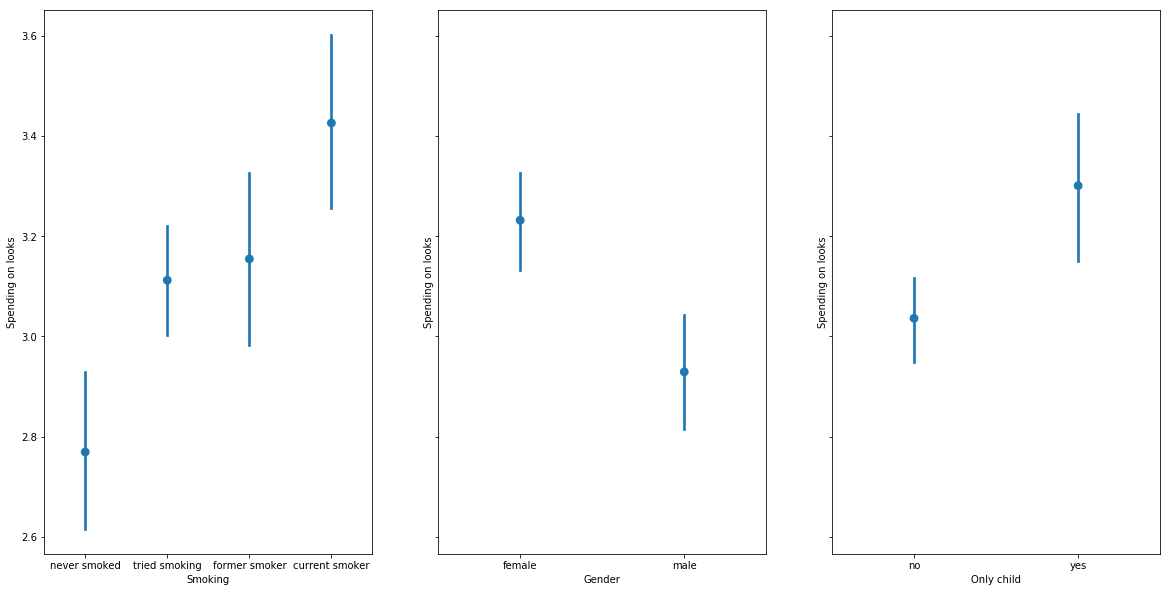

In [87]:
# plt.figure(figsize=(10,10))
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
ax1 = sns.pointplot(data=responses, x='Smoking', y='Spending on looks', join = False, ax=axes[0])
ax2 = sns.pointplot(data=responses, x='Gender', y='Spending on looks', join = False, ax=axes[1])
ax3 = sns.pointplot(data=responses, x='Only child', y='Spending on looks', join = False, ax=axes[2])

In [166]:
smoking_cats = ['Smoking_former smoker','Smoking_tried smoking', 'Smoking_never smoked']

means = features[smoking_cats].mean(axis=0)
stds = features[smoking_cats].std(axis=0)
features['smoking_combined'] = ((features[['Smoking_former smoker','Smoking_tried smoking', 'Smoking_never smoked']] - means) / stds).mean(axis=1)

## Make features dataframe

- make dummy variables for categorical
- look to combine variables
- look to change continuous into categorical

                         Smoking_former smoker  Smoking_never smoked  \
Smoking_former smoker                 1.000000             -0.233142   
Smoking_never smoked                 -0.233142              1.000000   
Smoking_tried smoking                -0.394181             -0.438495   
Gender_male                          -0.033084             -0.003198   
Only child_yes                        0.005970             -0.007386   
Spending on looks                     0.018284             -0.142731   
Shopping                              0.035782             -0.046857   
Shopping centres                      0.019861             -0.017979   
Branded clothing                      0.036400             -0.109982   
Entertainment spending                0.039083             -0.200082   
Appearence and gestures               0.013867             -0.082702   
Spending on gadgets                  -0.000615             -0.045794   

                         Smoking_tried smoking  Gender_male  On

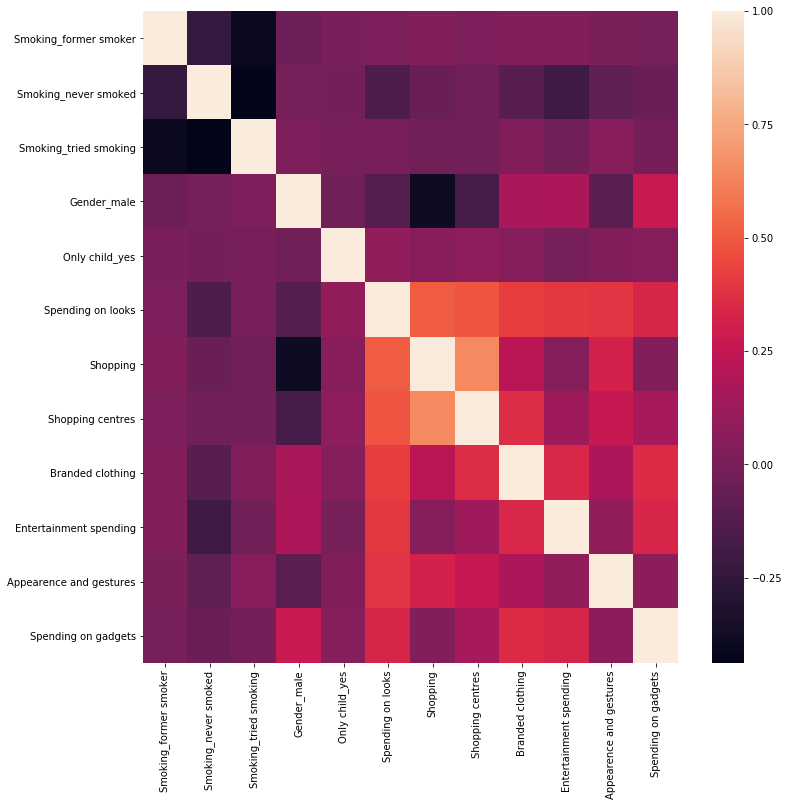

In [150]:
# make dummies for categorical variables
features = pd.get_dummies(responses[['Smoking', 'Gender', 'Only child']], drop_first=True)

# put continuous variables of interest into dataframe
num_vars = ['Spending on looks', 'Shopping', 
      'Shopping centres', 'Branded clothing', 'Entertainment spending', 
      'Appearence and gestures', 'Spending on gadgets'] #continuous variable column names
features[num_vars] = responses[num_vars]

#look for highly correlated variables
plt.figure(figsize=(12,12))
print(features.corr())
sns.heatmap(features.corr())

In [151]:
#combine shopping and shopping centres
means = responses[['Shopping','Shopping centres']].mean(axis=0)
stds = responses[['Shopping','Shopping centres']].std(axis=0)
features['Shopping_combined'] = ((responses[['Shopping','Shopping centres']] - means)/stds).mean(axis=1)

plotdf = responses.loc[:,['Spending on looks','Shopping','Shopping centres']]
plotdf['combined'] = features['Shopping_combined']
print(plotdf.corr())

                   Spending on looks  Shopping  Shopping centres  combined
Spending on looks           1.000000  0.510987          0.488448  0.549458
Shopping                    0.510987  1.000000          0.651585  0.908833
Shopping centres            0.488448  0.651585          1.000000  0.908833
combined                    0.549458  0.908833          0.908833  1.000000


Turn all (originally) numerical variables into categorical variables. All are surveys with 1-5 (strongly disagree to strongly agree) so we will turn 1-3 into 0 and 4-5 into 1 for each variable. Let's also do this with 1-2 being 0 and 4-5 being 1.

In [154]:
for col in num_vars:
    features['cat_'+col] = np.where(features[col] > 3, 1, 0)

for col in num_vars:
    features['cat2_'+col] = np.where(features[col] >= 3, 1, 0)    
    
features['cat_Shopping combined'] = np.where(features['Shopping_combined'] > 0, 1, 0)

features['cat2_Shopping combined'] = np.where(features['Shopping_combined'] >= 0, 1, 0)

                              Smoking_former smoker  Smoking_never smoked  \
Smoking_former smoker                      1.000000             -0.233142   
Smoking_never smoked                      -0.233142              1.000000   
Smoking_tried smoking                     -0.394181             -0.438495   
Gender_male                               -0.033084             -0.003198   
Only child_yes                             0.005970             -0.007386   
Spending on looks                          0.018284             -0.142731   
Shopping                                   0.035782             -0.046857   
Shopping centres                           0.019861             -0.017979   
Branded clothing                           0.036400             -0.109982   
Entertainment spending                     0.039083             -0.200082   
Appearence and gestures                    0.013867             -0.082702   
Spending on gadgets                       -0.000615             -0.045794   

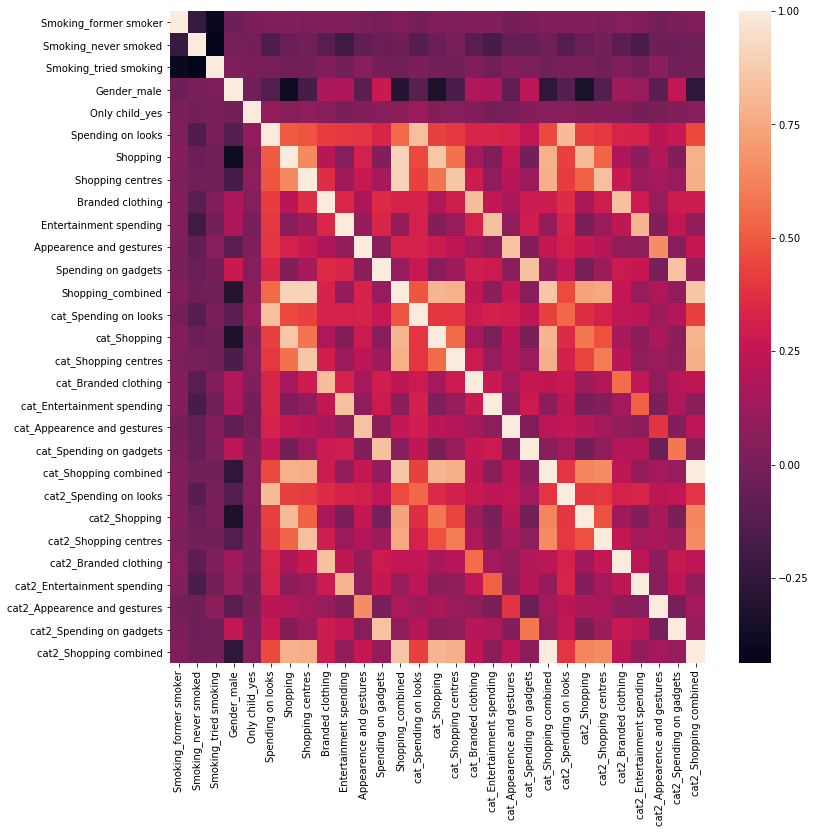

In [155]:
plt.figure(figsize=(12,12))
print(features.corr())
sns.heatmap(features.corr())

In [189]:
# filter based on correlation

sol_r2 = features.corr()['Spending on looks']**2 #spending on looks r squared values
sol_r2.sort_values(ascending=False)

Spending on looks               1.000000
cat_Spending on looks           0.696510
cat2_Spending on looks          0.671385
Shopping_combined               0.301904
Shopping                        0.261108
Shopping centres                0.238582
cat2_Shopping combined          0.204551
cat_Shopping combined           0.204551
cat_Shopping                    0.184939
cat2_Shopping                   0.183617
Branded clothing                0.173787
Entertainment spending          0.162938
cat_Shopping centres            0.162645
cat2_Shopping centres           0.161612
Appearence and gestures         0.150536
cat_Branded clothing            0.112674
cat_Entertainment spending      0.111953
Spending on gadgets             0.111842
cat2_Branded clothing           0.109116
cat2_Entertainment spending     0.101609
cat_Appearence and gestures     0.101343
cat2_Spending on gadgets        0.070760
cat_Spending on gadgets         0.059489
cat2_Appearence and gestures    0.049446
Smoking_never sm

We will pick the features based on how much of they explain the variance (the r^2 value) of our outcome variable, Spending on looks. Evaluating the list from the top down we can throw out the first three because they literally are the outcome variable (it was simpler to just leave them in their and ignore them later). The next feature is our **Shopping_combined** feature, which was a combination of Shopping and Shopping centres. This will be our first final feature. This means we will have to ignore Shopping, Shopping centres, and any features derived from these two features as well as any feature derived from Shopping_combined. That brings us to our second and third final features, **Branded clothing** and **Entertainment spending**. Our fourth will be **Appearance and gestures**. Our fifth will be **Spending on gadgets**.


## Final Features:
1. Shopping_combined
2. Branded clothing
3. Entertainment spending
4. Appearance and gestures
5. Spending on gadgets

These features all pass the common sense test as well. It is not surprising that any of these are related to the amount someone spend on their looks.